### DL des données

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statistics

file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories.bed')
reader = pd.read_csv(file, delimiter='\t')

In [15]:
reader.head()

,chr,start,end,type,distClosestG4,CGI,Ori,TSS
0,chr1,11008,11026,Canonical,33,0,0,0
1,chr1,11058,11078,Canonical,33,0,0,0
2,chr1,12487,12514,Bulge,1410,0,0,0
3,chr1,14664,14683,Bulge,1267,0,0,0
4,chr1,15949,15973,Bulge,687,0,0,0


In [16]:
reader

,chr,start,end,type,distClosestG4,CGI,Ori,TSS
0,chr1,11008,11026,Canonical,33,0,0,0
1,chr1,11058,11078,Canonical,33,0,0,0
2,chr1,12487,12514,Bulge,1410,0,0,0
3,chr1,14664,14683,Bulge,1267,0,0,0
4,chr1,15949,15973,Bulge,687,0,0,0
...,...,...,...,...,...,...,...,...
732447,chrY,59362173,59362191,Canonical,370,0,0,0
732448,chrY,59362560,59362587,Canonical,9,0,0,0
732449,chrY,59362595,59363470,G-track,9,0,0,0
732450,chrY,59363480,59363508,Bulge,11,0,0,0


### Première approche sur les données

##### Boîte à moustache des distances, quantiles

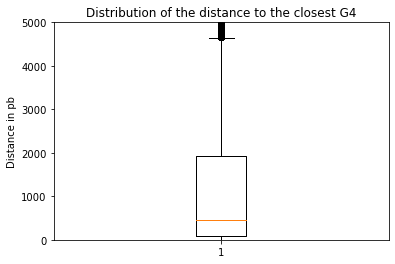

0.25     33.00
0.50    160.00
0.75    784.25
Name: distClosestG4, dtype: float64
nb de G4 en cluster :  187356
Taux de G4 en cluster :  25.57928710686844 %


In [17]:
### Boîte à moustache des distances, quantiles

dist = reader['distClosestG4']

plt.boxplot(dist)
plt.ylim(0,5000)
plt.ylabel("Distance in pb")
plt.title("Distribution of the distance to the closest G4")
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig1.jpg')
plt.show()

print(dist[:20].quantile([0.25,0.5,0.75]))

nb_cluster = len(reader[dist <= 100])
print("nb de G4 en cluster : ",  nb_cluster)
print("Taux de G4 en cluster : ", nb_cluster/len(dist)*100, "%")


##### Distance au plus proche voisin


178979 299994 2249 230280 20950


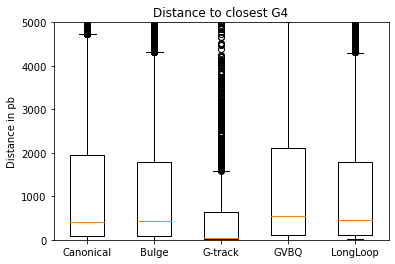

In [18]:
### Nb de G4 de chaque catégorie

cat = reader['type']

nb_can = len(reader[cat == 'Canonical'])
nb_bulg = len(reader[cat == 'Bulge'])
nb_gtrack = len(reader[cat == 'G-track'])
nb_gvbq = len(reader[cat == 'GVBQ'])
nb_longloop = len(reader[cat == 'LongLoop'])

print(nb_can, nb_bulg, nb_gtrack, nb_gvbq, nb_longloop)

### Distance aux G4 les plus proches pour chaque catégorie

can_dist = reader[cat == 'Canonical']['distClosestG4']
bulg_dist = reader[cat == 'Bulge']['distClosestG4']
gtrack_dist = reader[cat == 'G-track']['distClosestG4']
GVBQ_dist = reader[cat == 'GVBQ']['distClosestG4']
longloop_dist = reader[cat == 'LongLoop']['distClosestG4']

plt.boxplot([can_dist, bulg_dist, gtrack_dist, GVBQ_dist, longloop_dist])

plt.gca().xaxis.set_ticklabels(['Canonical', 'Bulge', 'G-track', 'GVBQ', 'LongLoop'])

plt.ylim(0,5000)
plt.ylabel("Distance in pb")
plt.title('Distance to closest G4')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig2.jpg')

plt.show()


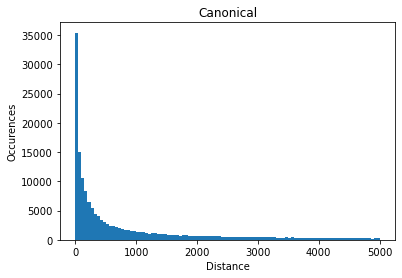

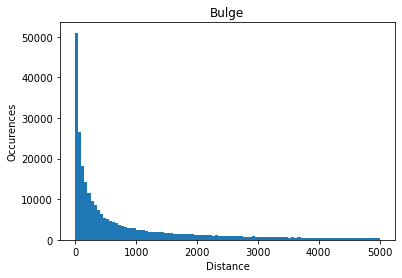

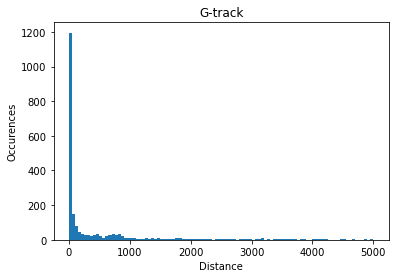

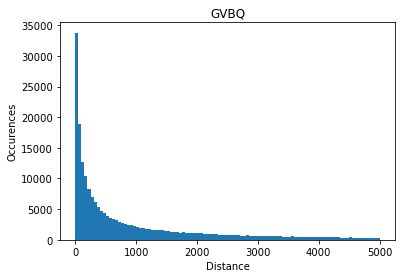

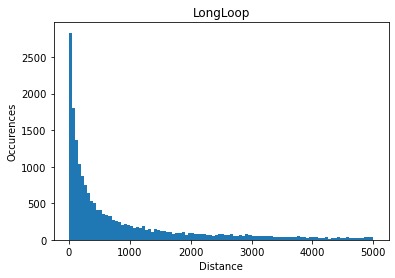

In [19]:
#Représentation sous forme d'un diagramme en bâtons 

plt.hist(can_dist, range = (0,5000), bins = 100)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.title('Canonical')
plt.show()

plt.hist(bulg_dist, range = (0,5000), bins = 100)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.title('Bulge')
plt.show()

plt.hist(gtrack_dist, range = (0,5000), bins = 100)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.title('G-track')
plt.show()

plt.hist(GVBQ_dist, range = (0,5000), bins = 100)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.title('GVBQ')
plt.show()

plt.hist(longloop_dist, range = (0,5000), bins = 100)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.title('LongLoop')
plt.show()

##### G4 proches des Ori / TSS

In [22]:
ori = reader[reader['Ori'] > 0]
tss = reader[reader['TSS'] > 0]
print("Pourcentage de G4 proche d'une Ori : ", len(ori)/len(reader)*100, "%")
print("Pourcentage de G4 proche d'un TSS : ", len(tss)/len(reader)*100, "%")

ori_cluster = len(ori[ori['distClosestG4']<101])
tss_cluster = len(tss[tss['distClosestG4']<101])

ori_canonical = len(ori[ori['type'] == 'Canonical'])
tss_canonical = len(tss[tss['type'] == 'Canonical'])

ori_bulge = len(ori[ori['type'] == 'Bulge'])
tss_bulge = len(tss[tss['type'] == 'Bulge'])

ori_gtrack = len(ori[ori['type'] == 'G-track'])
tss_gtrack = len(tss[tss['type'] == 'G-track'])

ori_GVBQ = len(ori[ori['type'] == 'GVBQ'])
tss_GVBQ = len(tss[tss['type'] == 'GVBQ'])

ori_longloop = len(ori[ori['type'] == 'LongLoop'])
tss_longloop = len(tss[tss['type'] == 'LongLoop'])

Pourcentage de G4 proche d'une Ori :  34.909318289799195 %
Pourcentage de G4 proche d'un TSS :  8.530115284004959 %


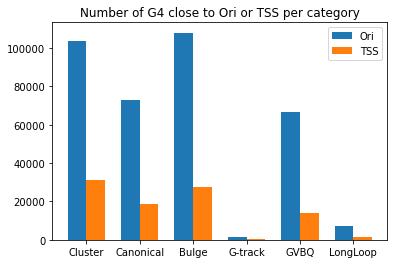

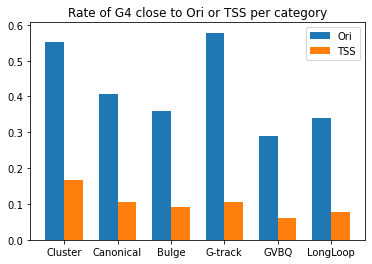

In [23]:
y1 = np.array([ori_cluster, ori_canonical, ori_bulge, ori_gtrack, ori_GVBQ, ori_longloop])
y2 = np.array([tss_cluster, tss_canonical, tss_bulge, tss_gtrack, tss_GVBQ, tss_longloop])
x = np.arange(6)
largeur = .35

labels = ['Cluster', 'Canonical', 'Bulge', 'G-track', 'GVBQ', 'LongLoop']

fig, ax = plt.subplots()
r1 = ax.bar(x - largeur/2, y1, largeur)
r2 = ax.bar(x + largeur/2, y2, largeur)

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['Ori', 'TSS'])
plt.title("Number of G4 close to Ori or TSS per category")
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig3.jpg')

plt.show()

n = np.array([nb_cluster, nb_can, nb_bulg, nb_gtrack, nb_gvbq, nb_longloop])

fig, ax = plt.subplots()
r1 = ax.bar(x - largeur/2, y1/n, largeur)
r2 = ax.bar(x + largeur/2, y2/n, largeur)

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['Ori', 'TSS'])
plt.title("Rate of G4 close to Ori or TSS per category")
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig4.jpg')

plt.show()

##### Taille des G4

In [24]:
length = reader['end'] - reader['start'] + 1
length_mean = length.mean()
print("Taille moyenne d'un G4 : ", length_mean)

#Pas cohérent avec les chiffres de l'article (36.4 bp) 
#mais plus cohérent dans l'absolu (taille max d'un G4 = 3*4 + 7*3 = 33)

Taille moyenne d'un G4 :  26.88055736075538


In [25]:
can = reader[cat == 'Canonical']
length = can['end'] - can['start'] + 1
length_mean_can = length.mean()
print("Taille moyenne d'un G4 canonique : ", length_mean_can)

Taille moyenne d'un G4 canonique :  27.987769514859284


In [26]:
long = reader[cat == 'LongLoop']
length = long['end'] - long['start'] + 1
length_mean = length.mean()
print("Taille moyenne d'un G4 LongLoop : ", length_mean)

Taille moyenne d'un G4 LongLoop :  33.3272076372315


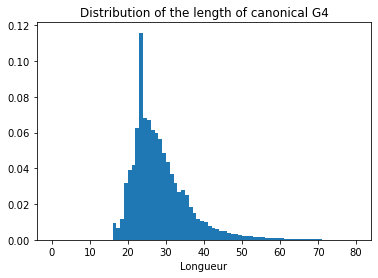

Moy :  27.987769514859284 , Var :  58.217223499357615


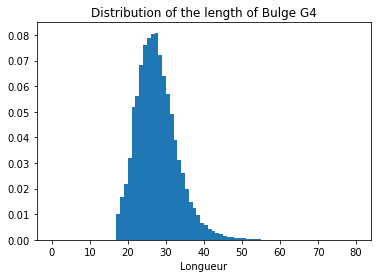

Moy :  27.164529957265813 , Var :  28.645618832337007


In [27]:
can = reader[cat == 'Canonical']
can_length = can['end'] - can['start'] + 1

res = plt.hist(can_length, range = (0,80), bins = 80, density = True)
plt.xlabel('Longueur')
plt.title('Distribution of the length of canonical G4')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig5.jpg')
plt.show()
print("Moy : ", can_length.mean(),", Var : ", can_length.var())

bulg = reader[cat == 'Bulge']
bulg_length = bulg['end'] - bulg['start'] + 1

res2 = plt.hist(bulg_length, range = (0,80), bins = 80, density = True)
plt.xlabel('Longueur')
plt.title('Distribution of the length of Bulge G4')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig6.jpg')
plt.show()
print("Moy : ", bulg_length.mean(),", Var : ", bulg_length.var())


### Simulation d'un jeu de données aléatoire

In [12]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/hg19.genome.main.chr')
reader2 = pd.read_csv(file2, delimiter='\t')
ligne0 = reader2.columns
reader2.loc[33] = ligne0
reader2.columns = ['chr', 'nb']

#Remise dans l'ordre
reader2.loc[34] = ligne0
reader2 = reader2.shift(periods = 1)
reader2.loc[0] = reader2.loc[34]
reader2 = reader2.drop([34])
reader2

,chr,nb
0,chr1,249250621
1,chr2,243199373
2,chr3,198022430
3,chr4,191154276
4,chr5,180915260
5,chr6,171115067
6,chr7,159138663
7,chrX,155270560
8,chr8,146364022
9,chr9,141213431


In [3]:
def nb_G4chrom(liste,cat,chrom):
    liste_bis = liste[liste['chr'] == chrom]
    liste_bis = liste_bis[liste_bis['type'] == cat]
    return len(liste_bis)

def proba_G4chrom(liste,cat,chrom):
    can = reader[reader['type'] == cat]
    can_length = can['end'] - can['start'] + 1

    res = plt.hist(can_length, range = (0,80), bins = 80, density = True)
    prob = res[0]
    density_prob = [prob[0]]
    for i in range(1,len(prob)):
        density_prob.append(density_prob[i-1] + prob[i])
    return density_prob

def dist(list_random):
    list_random_plusone = list_random.shift(periods=1)
    list_random_minusone = list_random.shift(periods = -1)
    dist1 = - list_random_plusone['end'] + list_random['start']
    dist2 =  - list_random['end'] + list_random_minusone['start']
    dist = pd.DataFrame(columns = ['dist1','dist2'])
    dist['dist1'] = dist1
    dist['dist2'] = dist2
    result = dist.min(axis = 1).astype(int)
    return result

def v_longueur(proba,np_proba):
    l = proba[len(proba)-1]
    i = len(proba)-1
    for i in range (len(proba)-1):
        np_proba[(proba[i] < np_proba) & (np_proba <= proba[i+1])] = i
    return np_proba

In [4]:
list_random_2 = pd.DataFrame(columns = reader.columns)
dico_nb_cat = {'Canonical':0, 'Bulge':0, 'GVBQ':0, 'LongLoop':0}
dico_proba_cat = {'Canonical':0, 'Bulge':0, 'GVBQ':0, 'LongLoop':0}

nu = 0

chr1


,chr,start,end,type,distClosestG4,CGI,Ori,TSS
0,chr1,8520,8540,GVBQ,2217,NaN,NaN,NaN
1,chr1,10757,10795,Canonical,770,NaN,NaN,NaN
2,chr1,11565,11614,Canonical,770,NaN,NaN,NaN
3,chr1,19419,19461,Canonical,6371,NaN,NaN,NaN
4,chr1,25832,25851,GVBQ,6371,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
65083,chr1,249235207,249235227,Bulge,267,NaN,NaN,NaN
65084,chr1,249235754,249235797,Canonical,527,NaN,NaN,NaN
65085,chr1,249243220,249243241,Bulge,4635,NaN,NaN,NaN
65086,chr1,249247876,249247900,Canonical,617,NaN,NaN,NaN


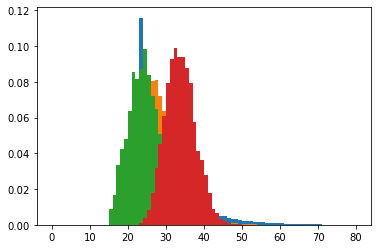

In [13]:
for index, line in reader2[:1].iterrows():
    chrom = line['chr']
    length_chrom = line['nb']
    list_interm = pd.DataFrame(columns = reader.columns)
    
    for cat,nb in dico_nb_cat.items():
        dico_nb_cat[cat] = nb_G4chrom(reader,cat,chrom)
        dico_proba_cat[cat] = proba_G4chrom(reader,cat,chrom)
    
    n_tot = 0

    for cat,nb in (dico_nb_cat.items()):
        n_tot += nb

    cat_column = np.zeros([n_tot,2])
    cat_type = []
    
    ni = 0
    for cat,nb in (dico_nb_cat.items()):
        proba = dico_proba_cat[cat]

        col1 = np.random.randint(0,length_chrom, size = nb)
        col2 = np.random.random(size = nb)
        col2_bis = v_longueur(proba, col2)
        col3 = col1 + col2_bis

        cat_column[ni:ni+nb][:,0] = col1
        cat_column[ni:ni+nb][:,1] = col3
        cat_type += [cat]*nb
        ni += nb
    
    list_interm['start'] = cat_column[:,0].astype(int)
    list_interm['end'] = cat_column[:,1].astype(int)
    list_interm['chr'] = chrom
    list_interm['type'] = cat_type
    list_interm = list_interm.sort_values(by = 'start')
    list_interm['distClosestG4'] = dist(list_interm)
    
    list_random_2 = pd.concat([list_random_2,list_interm])
    
    
    nu += n_tot
    print(chrom)
    
list_random_2 = list_random_2.reset_index(drop = True)
list_random_2
    
    

In [14]:
list_random_2 = list_random_2[list_random_2['distClosestG4']>0] #on enlève les chevauchements

In [15]:
list_random_2

,chr,start,end,type,distClosestG4,CGI,Ori,TSS
0,chr1,8520,8540,GVBQ,2217,NaN,NaN,NaN
1,chr1,10757,10795,Canonical,770,NaN,NaN,NaN
2,chr1,11565,11614,Canonical,770,NaN,NaN,NaN
3,chr1,19419,19461,Canonical,6371,NaN,NaN,NaN
4,chr1,25832,25851,GVBQ,6371,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
65083,chr1,249235207,249235227,Bulge,267,NaN,NaN,NaN
65084,chr1,249235754,249235797,Canonical,527,NaN,NaN,NaN
65085,chr1,249243220,249243241,Bulge,4635,NaN,NaN,NaN
65086,chr1,249247876,249247900,Canonical,617,NaN,NaN,NaN


In [17]:
(65088-64202)/65088*100

1.3612340216322518

##### Vérification de la base de données

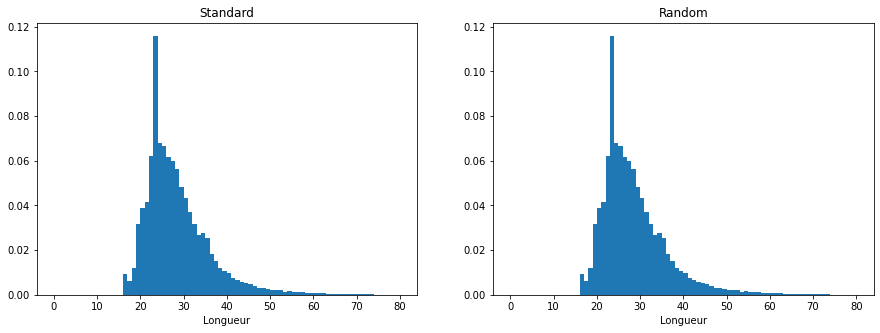

Moy :  27.987769514859284 , Var :  58.217223499357615
Moy :  27.983352982519783 , Var :  57.34311702692706


In [17]:
can = reader[reader['type'] == 'Canonical']
can_length = can['end'] - can['start'] + 1

can_rd = list_random_2[list_random_2['type'] == 'Canonical']
can_rd_length = can_rd['end'] - can_rd['start'] + 1

plt.figure(figsize = (15,5))
plt.subplot(121)
res = plt.hist(can_length, range = (0,80), bins = 80, density = True)
plt.xlabel('Longueur')
plt.title('Standard')

plt.subplot(122)
res = plt.hist(can_length, range = (0,80), bins = 80, density = True)
plt.xlabel('Longueur')
plt.title('Random')


plt.show()
print("Moy : ", can_length.mean(),", Var : ", can_length.var())
print("Moy : ", can_rd_length.mean(),", Var : ", can_rd_length.var())


##### Sauvegarde de la base de données

In [27]:
list_random_2.to_csv('random_G4.csv')

#### Comparaison de la base aléatoire et de la base de référence

In [34]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/hg19.genome.main.chr')
reader2 = pd.read_csv(file2, delimiter='\t')
ligne0 = reader2.columns
reader2.loc[33] = ligne0
reader2.columns = ['chr', 'nb']

#Remise dans l'ordre
reader2.loc[34] = ligne0
reader2 = reader2.shift(periods = 1)
reader2.loc[0] = reader2.loc[34]
reader2 = reader2.drop([34])
reader2

,chr,nb
0,chr1,249250621
1,chr2,243199373
2,chr3,198022430
3,chr4,191154276
4,chr5,180915260
5,chr6,171115067
6,chr7,159138663
7,chrX,155270560
8,chr8,146364022
9,chr9,141213431


In [28]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4.csv')
list_random_2 = pd.read_csv(file2)
list_random_2.drop('Unnamed: 0', axis=1, inplace=True)
list_random_2

,chr,start,end,type,distClosestG4,CGI,Ori,TSS
0,chr1,2402,2426,Bulge,473,NaN,NaN,NaN
1,chr1,2899,2933,LongLoop,473,NaN,NaN,NaN
2,chr1,10525,10551,Bulge,918,NaN,NaN,NaN
3,chr1,11469,11503,Canonical,918,NaN,NaN,NaN
4,chr1,16111,16130,Bulge,2181,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
720229,chr21,48113314,48113335,GVBQ,4140,NaN,NaN,NaN
720230,chr21,48117475,48117497,Canonical,2462,NaN,NaN,NaN
720231,chr21,48119959,48119981,GVBQ,2462,NaN,NaN,NaN
720232,chr21,48123506,48123534,Bulge,2176,NaN,NaN,NaN


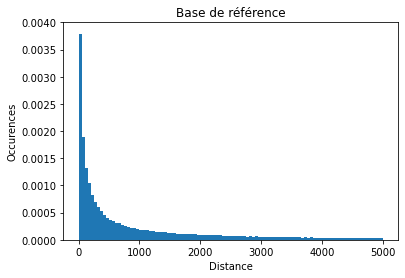

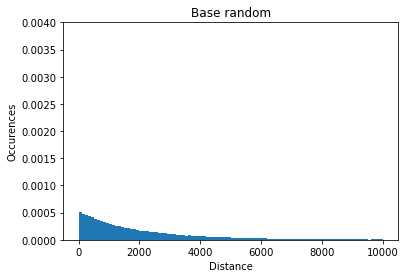

In [29]:
distance_reg = reader['distClosestG4']
distance_rd = list_random_2['distClosestG4']

plt.hist(distance_reg, range = (0,5000), bins = 100, density = True)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.ylim(0,0.0040)
plt.title('Base de référence')
plt.show()

plt.hist(distance_rd, range = (0,10000), bins = 100, density = True)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.ylim(0,0.0040)
plt.title('Base random')
plt.show()

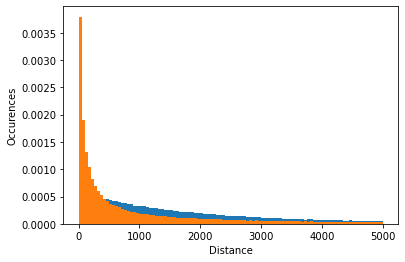

In [30]:
distance_reg = reader['distClosestG4']
distance_rd = list_random_2['distClosestG4']

hist_rd = plt.hist(distance_rd, range = (0,5000), bins = 100, density = True)
hist_reg = plt.hist(distance_reg, range = (0,5000), bins = 100, density = True)

plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.show()

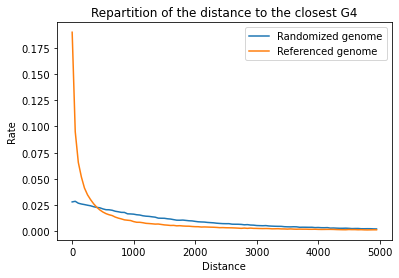

In [31]:
n = hist_rd[0]*50
bins = hist_rd[1]
plt.plot(bins[:-1], n, '-')

n = hist_reg[0]*50
bins = hist_reg[1]
plt.plot(bins[:-1], n, '-')

plt.xlabel('Distance')
plt.ylabel('Rate')
plt.title('Repartition of the distance to the closest G4')
plt.legend(["Randomized genome","Referenced genome"])
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig7.jpg')
plt.show()

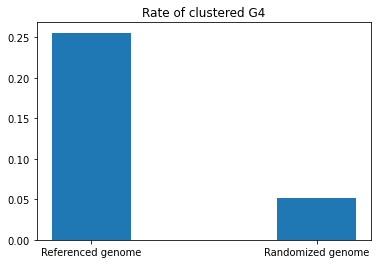

In [32]:
#G4 en cluster

cluster_reg = reader[reader['distClosestG4'] < 101]
cluster_rd = list_random_2[list_random_2['distClosestG4'] < 101]
largeur = .35
labels = ['Referenced genome', 'Randomized genome']

fig, ax = plt.subplots()

plt.bar([1,2],[len(cluster_reg)/len(reader), len(cluster_rd)/len(list_random_2)],largeur)

ax.set_xticks([1,2])
ax.set_xticklabels(labels)

plt.title('Rate of clustered G4')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig8.jpg')


plt.show()

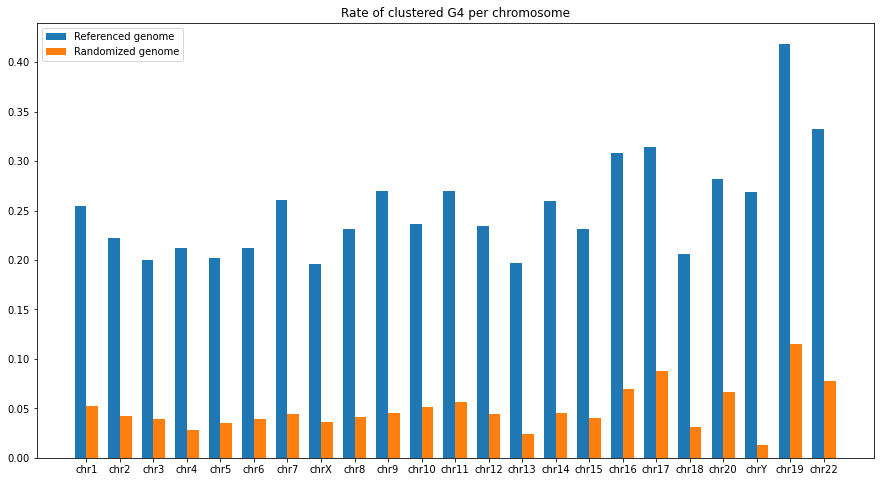

In [35]:
# Par chromosome

list_reg = []
list_rd = []
list_chrom = []
for index, line in reader2[:23].iterrows():
    chrom = line['chr']
    list_chrom.append(chrom)
    length_chrom = line['nb']
    
    reg = reader[reader['chr'] == chrom]
    reg2 = reg[reg['distClosestG4'] < 100]
    rd = list_random_2[list_random_2['chr'] == chrom]
    rd2 = rd[rd['distClosestG4'] < 100]
    
    list_reg.append(len(reg2)/len(reg))
    list_rd.append(len(rd2)/len(rd))
    
    
x = np.arange(len(list_reg))
largeur = .35

fig, ax = plt.subplots(figsize = (15,8))
r1 = ax.bar(x - largeur/2, list_reg, largeur)
r2 = ax.bar(x + largeur/2, list_rd, largeur)

ax.set_xticks(x)
ax.set_xticklabels(list_chrom)

plt.legend(['Referenced genome', 'Randomized genome'])
plt.title("Rate of clustered G4 per chromosome")

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig9.jpg')
plt.show()

    

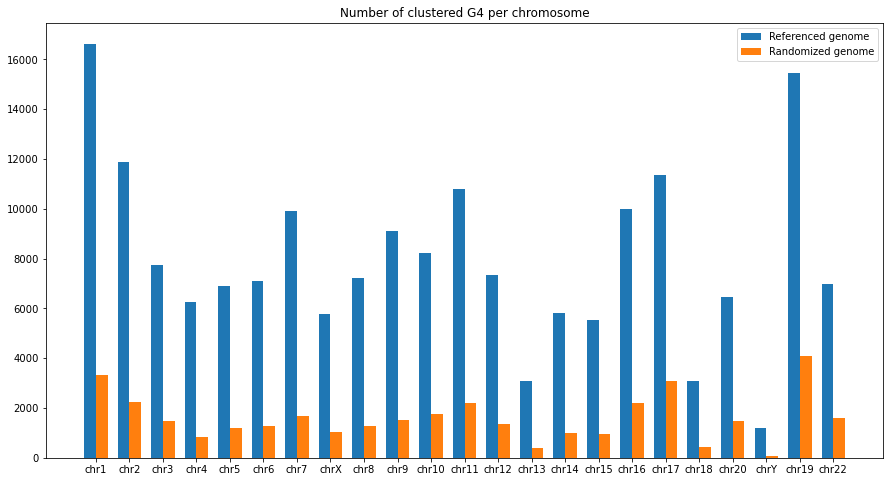

In [36]:
# Par chromosome

list_reg = []
list_rd = []
list_chrom = []
for index, line in reader2[:23].iterrows():
    chrom = line['chr']
    list_chrom.append(chrom)
    length_chrom = line['nb']
    
    reg = reader[reader['chr'] == chrom]
    reg2 = reg[reg['distClosestG4'] < 100]
    rd = list_random_2[list_random_2['chr'] == chrom]
    rd2 = rd[rd['distClosestG4'] < 100]
    
    list_reg.append(len(reg2))
    list_rd.append(len(rd2))
    
    
x = np.arange(len(list_reg))
largeur = .35

fig, ax = plt.subplots(figsize = (15,8))
r1 = ax.bar(x - largeur/2, list_reg, largeur)
r2 = ax.bar(x + largeur/2, list_rd, largeur)

ax.set_xticks(x)
ax.set_xticklabels(list_chrom)

plt.legend(['Referenced genome', 'Randomized genome'])
plt.title("Number of clustered G4 per chromosome")

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig11.jpg')
plt.show()

In [37]:
#Selon le type de G4

list_reg = []
list_rd = []
list_cat = []

for cat,nb in dico_nb_cat.items():
    list_cat.append(cat)

    reg = reader[reader['type'] == cat]
    reg2 = reg[reg['distClosestG4'] < 100]
    rd = list_random_2[list_random_2['type'] == cat]
    rd2 = rd[rd['distClosestG4'] < 100]
    
    list_reg.append(len(reg2)/len(reg))
    list_rd.append(len(rd2)/len(rd))
    
    
x = np.arange(len(list_reg))
largeur = .35

fig, ax = plt.subplots(figsize = (10,5))
r1 = ax.bar(x - largeur/2, list_reg, largeur)
r2 = ax.bar(x + largeur/2, list_rd, largeur)

ax.set_xticks(x)
ax.set_xticklabels(list_cat)

plt.legend(['Referenced genome', 'Randomized genome'])
plt.title("Rate of clustered G4 per type")

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig10.jpg')
plt.show()

NameError: name 'dico_nb_cat' is not defined

In [50]:
list_random_2

,chr,start,end,type,distClosestG4,CGI,Ori,TSS


# Même chose avec brin -

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statistics

file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4minus_categories.bed')
reader = pd.read_csv(file, delimiter='\t')

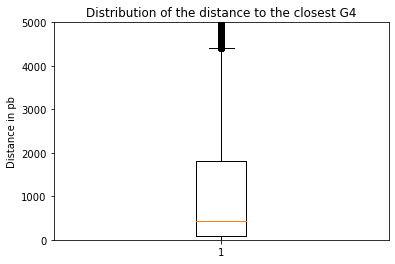

0.25     28.0
0.50     87.5
0.75    298.5
Name: distClosestG4, dtype: float64
nb de G4 en cluster :  203607
Taux de G4 en cluster :  26.309179081045247 %


In [2]:
### Boîte à moustache des distances, quantiles

dist = reader['distClosestG4']

plt.boxplot(dist)
plt.ylim(0,5000)
plt.ylabel("Distance in pb")
plt.title("Distribution of the distance to the closest G4")
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig1.jpg')
plt.show()

print(dist[:20].quantile([0.25,0.5,0.75]))

nb_cluster = len(reader[dist <= 100])
print("nb de G4 en cluster : ",  nb_cluster)
print("Taux de G4 en cluster : ", nb_cluster/len(dist)*100, "%")


##### Distance au plus proche voisin


177931 300879 2258 229732 63101


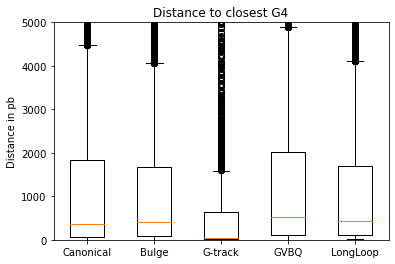

In [3]:
### Nb de G4 de chaque catégorie

cat = reader['type']

nb_can = len(reader[cat == 'Canonical'])
nb_bulg = len(reader[cat == 'Bulge'])
nb_gtrack = len(reader[cat == 'G-track'])
nb_gvbq = len(reader[cat == 'GVBQ'])
nb_longloop = len(reader[cat == 'LongLoop'])

print(nb_can, nb_bulg, nb_gtrack, nb_gvbq, nb_longloop)

### Distance aux G4 les plus proches pour chaque catégorie

can_dist = reader[cat == 'Canonical']['distClosestG4']
bulg_dist = reader[cat == 'Bulge']['distClosestG4']
gtrack_dist = reader[cat == 'G-track']['distClosestG4']
GVBQ_dist = reader[cat == 'GVBQ']['distClosestG4']
longloop_dist = reader[cat == 'LongLoop']['distClosestG4']

plt.boxplot([can_dist, bulg_dist, gtrack_dist, GVBQ_dist, longloop_dist])

plt.gca().xaxis.set_ticklabels(['Canonical', 'Bulge', 'G-track', 'GVBQ', 'LongLoop'])

plt.ylim(0,5000)
plt.ylabel("Distance in pb")
plt.title('Distance to closest G4')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig2.jpg')

plt.show()


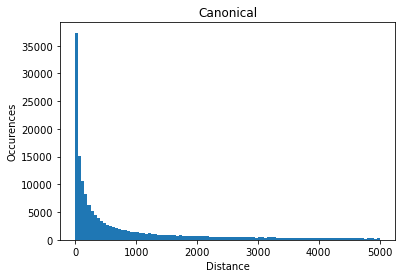

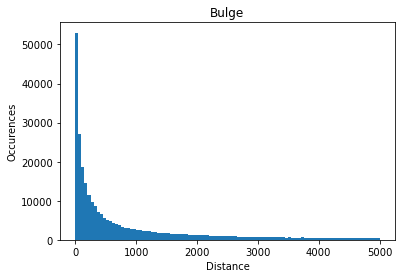

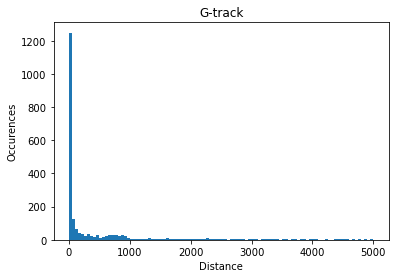

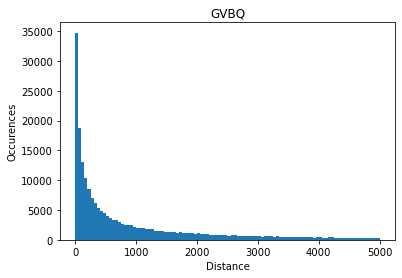

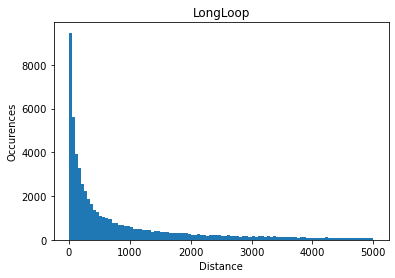

In [4]:
#Représentation sous forme d'un diagramme en bâtons 

plt.hist(can_dist, range = (0,5000), bins = 100)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.title('Canonical')
plt.show()

plt.hist(bulg_dist, range = (0,5000), bins = 100)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.title('Bulge')
plt.show()

plt.hist(gtrack_dist, range = (0,5000), bins = 100)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.title('G-track')
plt.show()

plt.hist(GVBQ_dist, range = (0,5000), bins = 100)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.title('GVBQ')
plt.show()

plt.hist(longloop_dist, range = (0,5000), bins = 100)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.title('LongLoop')
plt.show()

##### G4 proches des Ori / TSS

In [5]:
ori = reader[reader['Ori'] > 0]
tss = reader[reader['TSS'] > 0]
print("Pourcentage de G4 proche d'une Ori : ", len(ori)/len(reader)*100, "%")
print("Pourcentage de G4 proche d'un TSS : ", len(tss)/len(reader)*100, "%")

ori_cluster = len(ori[ori['distClosestG4']<101])
tss_cluster = len(tss[tss['distClosestG4']<101])

ori_canonical = len(ori[ori['type'] == 'Canonical'])
tss_canonical = len(tss[tss['type'] == 'Canonical'])

ori_bulge = len(ori[ori['type'] == 'Bulge'])
tss_bulge = len(tss[tss['type'] == 'Bulge'])

ori_gtrack = len(ori[ori['type'] == 'G-track'])
tss_gtrack = len(tss[tss['type'] == 'G-track'])

ori_GVBQ = len(ori[ori['type'] == 'GVBQ'])
tss_GVBQ = len(tss[tss['type'] == 'GVBQ'])

ori_longloop = len(ori[ori['type'] == 'LongLoop'])
tss_longloop = len(tss[tss['type'] == 'LongLoop'])

Pourcentage de G4 proche d'une Ori :  34.77873784889798 %
Pourcentage de G4 proche d'un TSS :  8.473435232671878 %


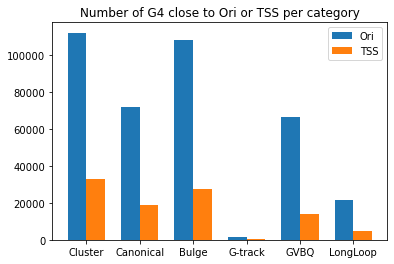

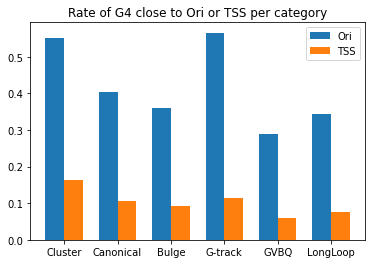

In [6]:
y1 = np.array([ori_cluster, ori_canonical, ori_bulge, ori_gtrack, ori_GVBQ, ori_longloop])
y2 = np.array([tss_cluster, tss_canonical, tss_bulge, tss_gtrack, tss_GVBQ, tss_longloop])
x = np.arange(6)
largeur = .35

labels = ['Cluster', 'Canonical', 'Bulge', 'G-track', 'GVBQ', 'LongLoop']

fig, ax = plt.subplots()
r1 = ax.bar(x - largeur/2, y1, largeur)
r2 = ax.bar(x + largeur/2, y2, largeur)

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['Ori', 'TSS'])
plt.title("Number of G4 close to Ori or TSS per category")
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig3.jpg')

plt.show()

n = np.array([nb_cluster, nb_can, nb_bulg, nb_gtrack, nb_gvbq, nb_longloop])

fig, ax = plt.subplots()
r1 = ax.bar(x - largeur/2, y1/n, largeur)
r2 = ax.bar(x + largeur/2, y2/n, largeur)

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['Ori', 'TSS'])
plt.title("Rate of G4 close to Ori or TSS per category")
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig4.jpg')

plt.show()

##### Taille des G4

In [7]:
length = reader['end'] - reader['start'] + 1
length_mean = length.mean()
print("Taille moyenne d'un G4 : ", length_mean)

#Pas cohérent avec les chiffres de l'article (36.4 bp) 
#mais plus cohérent dans l'absolu (taille max d'un G4 = 3*4 + 7*3 = 33)

Taille moyenne d'un G4 :  27.26776939169222


In [8]:
can = reader[cat == 'Canonical']
length = can['end'] - can['start'] + 1
length_mean_can = length.mean()
print("Taille moyenne d'un G4 canonique : ", length_mean_can)

Taille moyenne d'un G4 canonique :  27.932917816456943


In [9]:
long = reader[cat == 'LongLoop']
length = long['end'] - long['start'] + 1
length_mean = length.mean()
print("Taille moyenne d'un G4 LongLoop : ", length_mean)

Taille moyenne d'un G4 LongLoop :  34.06497519849131


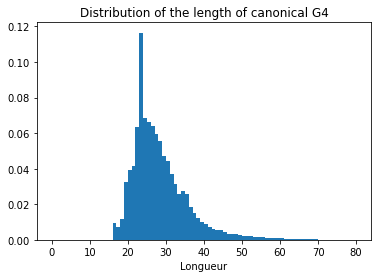

Moy :  27.932917816456943 , Var :  58.12936158633862


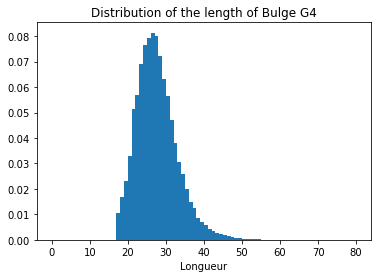

Moy :  27.111150994253503 , Var :  28.714322008585476


In [10]:
can = reader[cat == 'Canonical']
can_length = can['end'] - can['start'] + 1

res = plt.hist(can_length, range = (0,80), bins = 80, density = True)
plt.xlabel('Longueur')
plt.title('Distribution of the length of canonical G4')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig5.jpg')
plt.show()
print("Moy : ", can_length.mean(),", Var : ", can_length.var())

bulg = reader[cat == 'Bulge']
bulg_length = bulg['end'] - bulg['start'] + 1

res2 = plt.hist(bulg_length, range = (0,80), bins = 80, density = True)
plt.xlabel('Longueur')
plt.title('Distribution of the length of Bulge G4')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig6.jpg')
plt.show()
print("Moy : ", bulg_length.mean(),", Var : ", bulg_length.var())


### Simulation d'un jeu de données aléatoire

In [11]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/hg19.genome.main.chr')
reader2 = pd.read_csv(file2, delimiter='\t')
ligne0 = reader2.columns
reader2.loc[33] = ligne0
reader2.columns = ['chr', 'nb']

#Remise dans l'ordre
reader2.loc[34] = ligne0
reader2 = reader2.shift(periods = 1)
reader2.loc[0] = reader2.loc[34]
reader2 = reader2.drop([34])
reader2

,chr,nb
0,chr1,249250621
1,chr2,243199373
2,chr3,198022430
3,chr4,191154276
4,chr5,180915260
5,chr6,171115067
6,chr7,159138663
7,chrX,155270560
8,chr8,146364022
9,chr9,141213431


In [12]:
def nb_G4chrom(liste,cat,chrom):
    liste_bis = liste[liste['chr'] == chrom]
    liste_bis = liste_bis[liste_bis['type'] == cat]
    return len(liste_bis)

def proba_G4chrom(liste,cat,chrom):
    can = reader[reader['type'] == cat]
    can_length = can['end'] - can['start'] + 1

    res = plt.hist(can_length, range = (0,80), bins = 80, density = True)
    prob = res[0]
    density_prob = [prob[0]]
    for i in range(1,len(prob)):
        density_prob.append(density_prob[i-1] + prob[i])
    return density_prob

def dist(list_random):
    list_random_plusone = list_random.shift(periods=1)
    list_random_minusone = list_random.shift(periods = -1)
    dist1 = - list_random_plusone['end'] + list_random['start']
    dist2 =  - list_random['end'] + list_random_minusone['start']
    dist = pd.DataFrame(columns = ['dist1','dist2'])
    dist['dist1'] = dist1
    dist['dist2'] = dist2
    result = dist.min(axis = 1).astype(int)
    return result

def v_longueur(proba,np_proba):
    l = proba[len(proba)-1]
    i = len(proba)-1
    for i in range (len(proba)-1):
        np_proba[(proba[i] < np_proba) & (np_proba <= proba[i+1])] = i
    return np_proba

In [39]:
list_random_2 = pd.DataFrame(columns = reader.columns)
dico_nb_cat = {'Canonical':0, 'Bulge':0, 'GVBQ':0, 'LongLoop':0}
dico_proba_cat = {'Canonical':0, 'Bulge':0, 'GVBQ':0, 'LongLoop':0}

nu = 0

chr1
chr2
chr3
chr4


KeyboardInterrupt: 

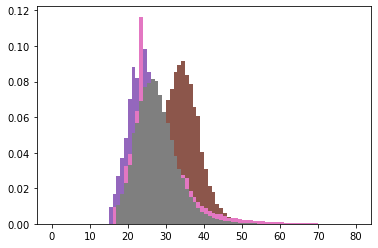

In [14]:
for index, line in reader2.iterrows():
    chrom = line['chr']
    length_chrom = line['nb']
    list_interm = pd.DataFrame(columns = reader.columns)
    
    for cat,nb in dico_nb_cat.items():
        dico_nb_cat[cat] = nb_G4chrom(reader,cat,chrom)
        dico_proba_cat[cat] = proba_G4chrom(reader,cat,chrom)
    
    n_tot = 0

    for cat,nb in (dico_nb_cat.items()):
        n_tot += nb

    cat_column = np.zeros([n_tot,2])
    cat_type = []
    
    ni = 0
    for cat,nb in (dico_nb_cat.items()):
        proba = dico_proba_cat[cat]

        col1 = np.random.randint(0,length_chrom, size = nb)
        col2 = np.random.random(size = nb)
        col2_bis = v_longueur(proba, col2)
        col3 = col1 + col2_bis

        cat_column[ni:ni+nb][:,0] = col1
        cat_column[ni:ni+nb][:,1] = col3
        cat_type += [cat]*nb
        ni += nb
    
    list_interm['start'] = cat_column[:,0].astype(int)
    list_interm['end'] = cat_column[:,1].astype(int)
    list_interm['chr'] = chrom
    list_interm['type'] = cat_type
    list_interm = list_interm.sort_values(by = 'start')
    list_interm['distClosestG4'] = dist(list_interm)
    
    list_random_2 = pd.concat([list_random_2,list_interm])
    
    
    nu += n_tot
    print(chrom)
    
list_random_2 = list_random_2.reset_index(drop = True)
list_random_2
    
    

In [ ]:
list_random_2 = list_random_2[list_random_2['distClosestG4']>0] #on enlève les chevauchements

##### Vérification de la base de données

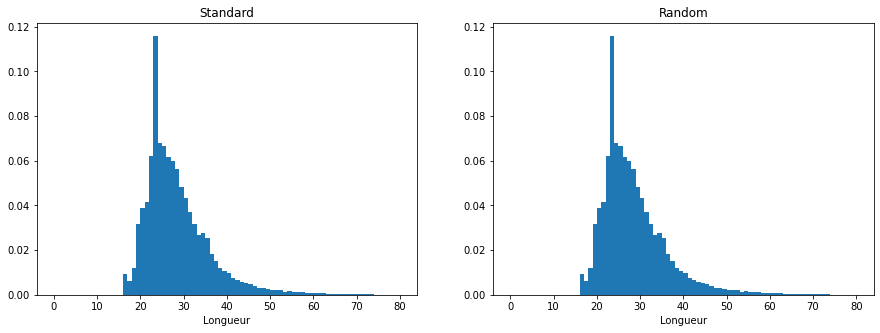

Moy :  27.987769514859284 , Var :  58.217223499357615
Moy :  27.983352982519783 , Var :  57.34311702692706


In [17]:
can = reader[reader['type'] == 'Canonical']
can_length = can['end'] - can['start'] + 1

can_rd = list_random_2[list_random_2['type'] == 'Canonical']
can_rd_length = can_rd['end'] - can_rd['start'] + 1

plt.figure(figsize = (15,5))
plt.subplot(121)
res = plt.hist(can_length, range = (0,80), bins = 80, density = True)
plt.xlabel('Longueur')
plt.title('Standard')

plt.subplot(122)
res = plt.hist(can_length, range = (0,80), bins = 80, density = True)
plt.xlabel('Longueur')
plt.title('Random')


plt.show()
print("Moy : ", can_length.mean(),", Var : ", can_length.var())
print("Moy : ", can_rd_length.mean(),", Var : ", can_rd_length.var())


##### Sauvegarde de la base de données

In [27]:
list_random_2.to_csv('random_G4.csv')

#### Comparaison de la base aléatoire et de la base de référence

In [34]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/hg19.genome.main.chr')
reader2 = pd.read_csv(file2, delimiter='\t')
ligne0 = reader2.columns
reader2.loc[33] = ligne0
reader2.columns = ['chr', 'nb']

#Remise dans l'ordre
reader2.loc[34] = ligne0
reader2 = reader2.shift(periods = 1)
reader2.loc[0] = reader2.loc[34]
reader2 = reader2.drop([34])
reader2

,chr,nb
0,chr1,249250621
1,chr2,243199373
2,chr3,198022430
3,chr4,191154276
4,chr5,180915260
5,chr6,171115067
6,chr7,159138663
7,chrX,155270560
8,chr8,146364022
9,chr9,141213431


In [44]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4.csv')
list_random_2 = pd.read_csv(file2)
list_random_2.drop('Unnamed: 0', axis=1, inplace=True)
list_random_2

,chr,start,end,type,distClosestG4,CGI,Ori,TSS
0,chr1,2402,2426,Bulge,473,NaN,NaN,NaN
1,chr1,2899,2933,LongLoop,473,NaN,NaN,NaN
2,chr1,10525,10551,Bulge,918,NaN,NaN,NaN
3,chr1,11469,11503,Canonical,918,NaN,NaN,NaN
4,chr1,16111,16130,Bulge,2181,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
720229,chr21,48113314,48113335,GVBQ,4140,NaN,NaN,NaN
720230,chr21,48117475,48117497,Canonical,2462,NaN,NaN,NaN
720231,chr21,48119959,48119981,GVBQ,2462,NaN,NaN,NaN
720232,chr21,48123506,48123534,Bulge,2176,NaN,NaN,NaN


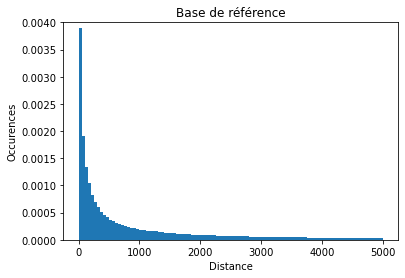

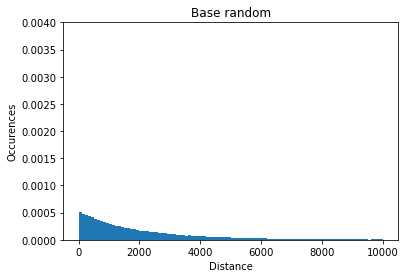

In [16]:
distance_reg = reader['distClosestG4']
distance_rd = list_random_2['distClosestG4']

plt.hist(distance_reg, range = (0,5000), bins = 100, density = True)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.ylim(0,0.0040)
plt.title('Base de référence')
plt.show()

plt.hist(distance_rd, range = (0,10000), bins = 100, density = True)
plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.ylim(0,0.0040)
plt.title('Base random')
plt.show()

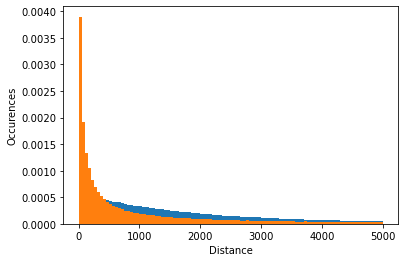

In [17]:
distance_reg = reader['distClosestG4']
distance_rd = list_random_2['distClosestG4']

hist_rd = plt.hist(distance_rd, range = (0,5000), bins = 100, density = True)
hist_reg = plt.hist(distance_reg, range = (0,5000), bins = 100, density = True)

plt.xlabel('Distance')
plt.ylabel('Occurences')
plt.show()

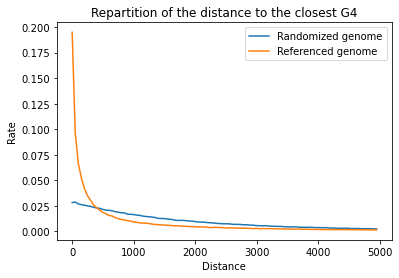

In [18]:
n = hist_rd[0]*50
bins = hist_rd[1]
plt.plot(bins[:-1], n, '-')

n = hist_reg[0]*50
bins = hist_reg[1]
plt.plot(bins[:-1], n, '-')

plt.xlabel('Distance')
plt.ylabel('Rate')
plt.title('Repartition of the distance to the closest G4')
plt.legend(["Randomized genome","Referenced genome"])
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig7.jpg')
plt.show()

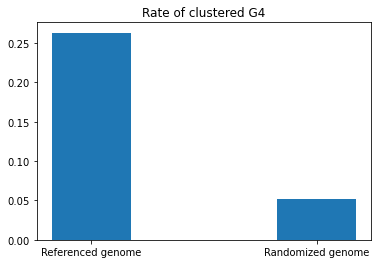

In [19]:
#G4 en cluster

cluster_reg = reader[reader['distClosestG4'] < 101]
cluster_rd = list_random_2[list_random_2['distClosestG4'] < 101]
largeur = .35
labels = ['Referenced genome', 'Randomized genome']

fig, ax = plt.subplots()

plt.bar([1,2],[len(cluster_reg)/len(reader), len(cluster_rd)/len(list_random_2)],largeur)

ax.set_xticks([1,2])
ax.set_xticklabels(labels)

plt.title('Rate of clustered G4')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig8.jpg')


plt.show()

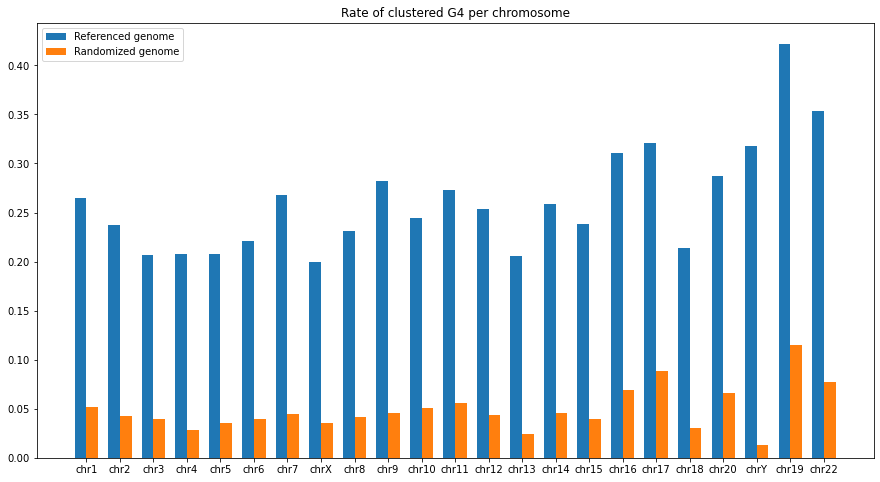

In [20]:
# Par chromosome

list_reg = []
list_rd = []
list_chrom = []
for index, line in reader2[:23].iterrows():
    chrom = line['chr']
    list_chrom.append(chrom)
    length_chrom = line['nb']
    
    reg = reader[reader['chr'] == chrom]
    reg2 = reg[reg['distClosestG4'] < 100]
    rd = list_random_2[list_random_2['chr'] == chrom]
    rd2 = rd[rd['distClosestG4'] < 100]
    
    list_reg.append(len(reg2)/len(reg))
    list_rd.append(len(rd2)/len(rd))
    
    
x = np.arange(len(list_reg))
largeur = .35

fig, ax = plt.subplots(figsize = (15,8))
r1 = ax.bar(x - largeur/2, list_reg, largeur)
r2 = ax.bar(x + largeur/2, list_rd, largeur)

ax.set_xticks(x)
ax.set_xticklabels(list_chrom)

plt.legend(['Referenced genome', 'Randomized genome'])
plt.title("Rate of clustered G4 per chromosome")

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig9.jpg')
plt.show()

    

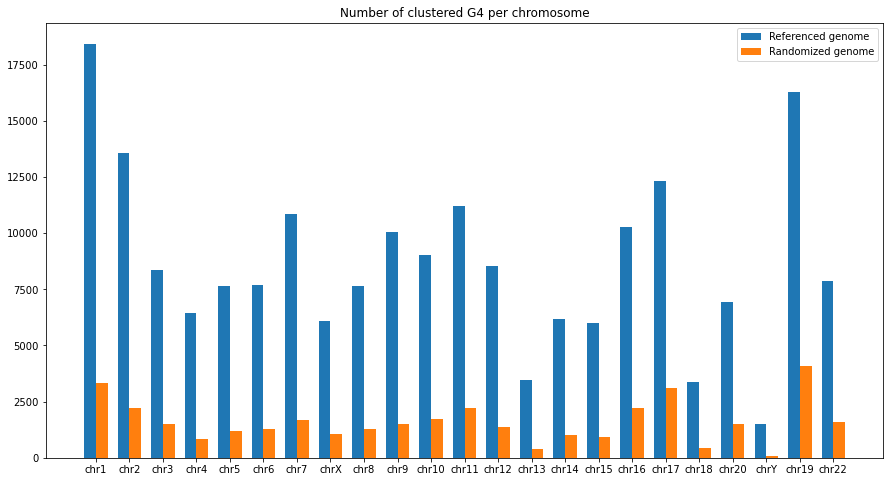

In [21]:
# Par chromosome

list_reg = []
list_rd = []
list_chrom = []
for index, line in reader2[:23].iterrows():
    chrom = line['chr']
    list_chrom.append(chrom)
    length_chrom = line['nb']
    
    reg = reader[reader['chr'] == chrom]
    reg2 = reg[reg['distClosestG4'] < 100]
    rd = list_random_2[list_random_2['chr'] == chrom]
    rd2 = rd[rd['distClosestG4'] < 100]
    
    list_reg.append(len(reg2))
    list_rd.append(len(rd2))
    
    
x = np.arange(len(list_reg))
largeur = .35

fig, ax = plt.subplots(figsize = (15,8))
r1 = ax.bar(x - largeur/2, list_reg, largeur)
r2 = ax.bar(x + largeur/2, list_rd, largeur)

ax.set_xticks(x)
ax.set_xticklabels(list_chrom)

plt.legend(['Referenced genome', 'Randomized genome'])
plt.title("Number of clustered G4 per chromosome")

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig11.jpg')
plt.show()

In [40]:
list_random_2 = pd.DataFrame(columns = reader.columns)
dico_nb_cat = {'Canonical':0, 'Bulge':0, 'GVBQ':0, 'LongLoop':0}
dico_proba_cat = {'Canonical':0, 'Bulge':0, 'GVBQ':0, 'LongLoop':0}

nu = 0

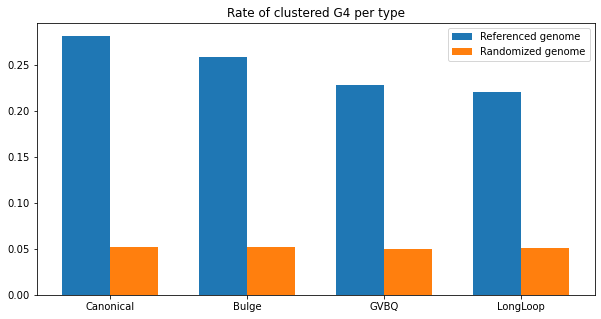

In [46]:
#Selon le type de G4

list_reg = []
list_rd = []
list_cat = []

for cat,nb in dico_nb_cat.items():
    list_cat.append(cat)

    reg = reader[reader['type'] == cat]
    reg2 = reg[reg['distClosestG4'] < 100]
    rd = list_random_2[list_random_2['type'] == cat]
    rd2 = rd[rd['distClosestG4'] < 100]
    
    list_reg.append(len(reg2)/len(reg))
    list_rd.append(len(rd2)/len(rd))
    
    
x = np.arange(len(list_reg))
largeur = .35

fig, ax = plt.subplots(figsize = (10,5))
r1 = ax.bar(x - largeur/2, list_reg, largeur)
r2 = ax.bar(x + largeur/2, list_rd, largeur)

ax.set_xticks(x)
ax.set_xticklabels(list_cat)

plt.legend(['Referenced genome', 'Randomized genome'])
plt.title("Rate of clustered G4 per type")

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig10.jpg')
plt.show()